<a href="https://colab.research.google.com/github/aakashsuryan67/Waste-Segregation-using-Comouter-VIsion/blob/master/training78.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
import keras.optimizers as kp

Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#Data Preparaion
train = {'labels' : [], 'features' : []}
classes = ['electronics', 'polybag', 'glass', 'metal', 'plastic', 'paperbag', 'papercup', 'paperwrap', 'newspaper', 'apple', 'banana', 'orange', 'cardboard', 'paper']
items = ['e', 'p', 'glass', 'metal', 'plastic','p', 'p', 'p', 'n', 'apple', 'b', 'o', 'cardboard', 'paper']
numOfImg =[160, 202, 501, 410, 482, 201, 223, 201, 235, 337, 310, 302, 403, 594]
numOfClasses = len(classes)
count = 0
for i in range(0, numOfClasses):
    for j in range(0, numOfImg[i]):
        tempImg = Image.open('gdrive/My Drive/Minor/Data/{0}/{1}{2}.jpg'.format(classes[i], items[i], j+1))
        reImg = tempImg.resize((200, 200))
       
        train['labels'].insert(count, i)
        train['features'].insert(count, np.array(reImg))
        count =count+1
        
x, y = np.array(train['features']), np.array(train['labels'])
print(x.shape)
print(y.shape)

x, y = shuffle(x, y)

(4561, 200, 200, 3)
(4561,)


In [0]:
#Separating Training, Testing Data and Validation Data

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2)
print(xTrain.shape)
print(yTrain.shape)

(3648, 200, 200, 3)
(3648,)


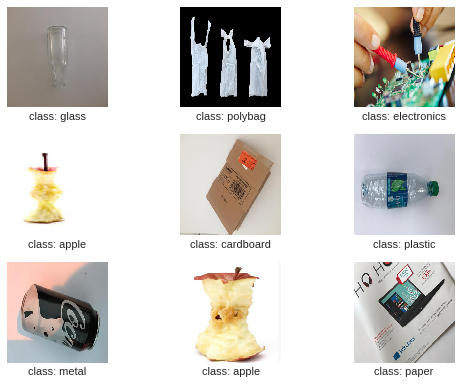

In [0]:
fig, axes = plt.subplots(3, 3) 
for i, ax in enumerate(axes.flat):
  ax.imshow(xTrain[i+45]) 
  ax.set_xlabel('class: {}'.format(classes[yTrain[i+45]])) 
  ax.set_xticks([]) 
  ax.set_yticks([])
plt.tight_layout()

In [0]:
mean = np.mean(xTrain)
std = np.std(xTrain)
xTrainNorm = (xTrain-mean)/std
xTestNorm = (xTest-mean)/std

In [0]:
imageShape = xTrainNorm[0].shape
imageShape

(200, 200, 3)

In [0]:
xTrainNorm[4]

array([[[ 0.63242953,  0.66159392,  0.85116248],
        [ 0.63242953,  0.66159392,  0.85116248],
        [ 0.63242953,  0.66159392,  0.85116248],
        ...,
        [ 0.51577195,  0.51577195,  0.69075831],
        [ 0.50118976,  0.50118976,  0.67617612],
        [ 0.48660756,  0.48660756,  0.66159392]],

       [[ 0.63242953,  0.66159392,  0.85116248],
        [ 0.63242953,  0.66159392,  0.85116248],
        [ 0.63242953,  0.66159392,  0.85116248],
        ...,
        [ 0.50118976,  0.50118976,  0.67617612],
        [ 0.48660756,  0.48660756,  0.66159392],
        [ 0.48660756,  0.48660756,  0.66159392]],

       [[ 0.63242953,  0.66159392,  0.85116248],
        [ 0.63242953,  0.66159392,  0.85116248],
        [ 0.63242953,  0.66159392,  0.85116248],
        ...,
        [ 0.48660756,  0.48660756,  0.66159392],
        [ 0.48660756,  0.48660756,  0.66159392],
        [ 0.48660756,  0.48660756,  0.66159392]],

       ...,

       [[ 0.39911438,  0.42827877,  0.61784733],
        [ 0

In [0]:
#Topology 
cnnModel = Sequential()
cnnModel.add(Conv2D(32, (3, 3), input_shape = imageShape, activation = 'relu'))
cnnModel.add(MaxPooling2D(pool_size = (2,2)))

cnnModel.add(Conv2D(64, (3, 3), activation = 'relu'))
cnnModel.add(MaxPooling2D(pool_size = (2,2)))
cnnModel.add(Dropout(0.25))

cnnModel.add(Conv2D(64, (3, 3), activation = 'relu'))
cnnModel.add(MaxPooling2D(pool_size = (2,2)))
cnnModel.add(Dropout(0.25))

cnnModel.add(Conv2D(128, (3, 3), activation = 'relu'))
cnnModel.add(MaxPooling2D(pool_size = (3,3)))
cnnModel.add(Dropout(0.25))

cnnModel.add(Conv2D(128, (5, 5), activation = 'relu'))
cnnModel.add(MaxPooling2D(pool_size = (2,2)))
cnnModel.add(Dropout(0.25))


cnnModel.add(Flatten())
cnnModel.add(Dense(output_dim = 512, activation = 'relu'))
cnnModel.add(Dropout(0.25))
cnnModel.add(Dense(output_dim = 256, activation = 'relu'))
cnnModel.add(Dropout(0.25))
cnnModel.add(Dense(output_dim = 256, activation = 'relu'))
cnnModel.add(Dropout(0.25))
cnnModel.add(Dense(output_dim = 128, activation = 'relu'))
cnnModel.add(Dropout(0.25))
cnnModel.add(Dense(output_dim = 64, activation = 'relu'))
cnnModel.add(Dropout(0.25))
cnnModel.add(Dense(output_dim = 14, activation = 'softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=512)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=256)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=256)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=64)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=14)`


In [0]:
opt = kp.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=1e-6)
cnnModel.compile(loss = 'sparse_categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])

In [0]:
history = cnnModel.fit(xTrainNorm, yTrain, batch_size = 64, nb_epoch = 100, verbose = 1, validation_data=(xTestNorm, yTest))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 3648 samples, validate on 913 samples
Epoch 1/100
3648/3648 [==============================] - 13s 4ms/step - loss: 2.5865 - acc: 0.1231 - val_loss: 2.5540 - val_acc: 0.1106
Epoch 2/100
3648/3648 [==============================] - 12s 3ms/step - loss: 2.3483 - acc: 0.1820 - val_loss: 2.2502 - val_acc: 0.2048
Epoch 3/100
3648/3648 [==============================] - 12s 3ms/step - loss: 2.1134 - acc: 0.2289 - val_loss: 2.3498 - val_acc: 0.1829
Epoch 4/100
3648/3648 [==============================] - 12s 3ms/step - loss: 2.0028 - acc: 0.2456 - val_loss: 2.3082 - val_acc: 0.1895
Epoch 5/100
3648/3648 [==============================] - 12s 3ms/step - loss: 1.9151 - acc: 0.2859 - val_loss: 2.1009 - val_acc: 0.2234
Epoch 6/100
3648/3648 [==============================] - 12s 3ms/step - loss: 1.8147 - acc: 0.3317 - val_loss: 1.7925 - val_acc: 0.3308
Epoch 7/100
3648/3648 [==============================] - 12s 3ms/step - loss: 1.7259 - acc: 0.3755 - val_loss: 1.7017 - val_acc: 0.4009
E

In [0]:
score = cnnModel.evaluate(xTestNorm, yTest, verbose = 0)
print('Test Loss: {:.4f}'.format(score[0]))
print('Test Accuracy: {:.2f}%'.format(score[1]*100))

Test Loss: 1.2387
Test Accuracy: 78.75%


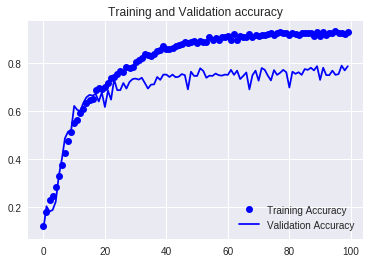

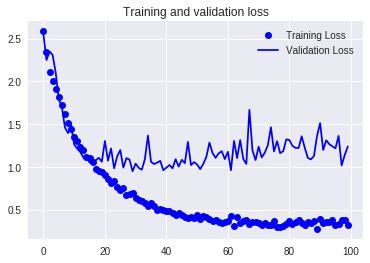

In [0]:
%matplotlib inline
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
predictedClasses = cnnModel.predict_classes(xTestNorm)
trueClasses = yTest

In [0]:
confMatrix = confusion_matrix(trueClasses, predictedClasses)
confMatrix

array([[24,  0,  1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 1, 35,  0,  0,  0,  3,  0,  1,  0,  1,  0,  0,  0,  0],
       [ 0,  0, 65, 10,  6,  0,  0,  0,  0,  0,  1,  0,  2,  1],
       [ 3,  0,  9, 61,  2,  0,  0,  1,  0,  1,  0,  0,  2,  3],
       [ 0,  0,  7,  5, 59,  0,  1,  1,  0,  0,  2,  0,  3,  3],
       [ 0,  3,  0,  2,  0, 36,  5,  1,  0,  0,  1,  0,  1,  0],
       [ 0,  3,  0,  0,  0,  2, 32,  4,  2,  5,  1,  0,  1,  1],
       [ 1,  7,  1,  0,  0,  0,  2, 19,  1,  1,  2,  0,  1,  0],
       [ 3,  1,  0,  0,  0,  0,  1,  1, 45,  0,  0,  0,  0,  4],
       [ 0,  0,  0,  0,  0,  0,  1,  0,  0, 72,  4,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  2,  0,  1,  0,  1, 55,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  2,  1,  1,  0,  7, 50,  0,  0],
       [ 0,  0,  0,  2,  3,  2,  1,  0,  0,  0,  0,  0, 67,  6],
       [ 4,  0,  9,  2,  6,  0,  3,  1,  1,  0,  1,  0,  3, 99]])

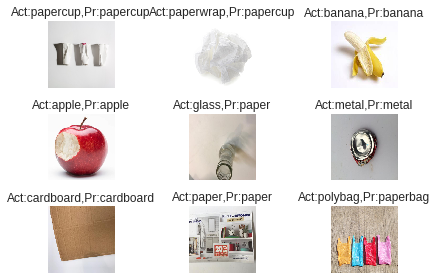

In [0]:
fig, axes = plt.subplots(3, 3)
for i, ax in enumerate(axes.flat):
  ax.imshow(xTest[i+123])
  ax.set_title('Act:{0},Pr:{1}'.format(classes[yTest[i+123]], classes[predictedClasses[i+123]]))
  ax.set_xticks([])
  ax.set_yticks([])
  
plt.tight_layout()

In [0]:
cnnModel.save_weights('gdrive/My Drive/weights78.h5')

In [0]:
cnnModel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 97, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 46, 46, 64)        36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 23, 23, 64)        0         
__________